In [14]:
import maze_generation as mg
import matplotlib.pyplot as plt
import cv2
import numpy as np

algorithm: backtracking
width: 21
height: 21
start: side 3, relative 0.5
end: side 3, relative 0.25



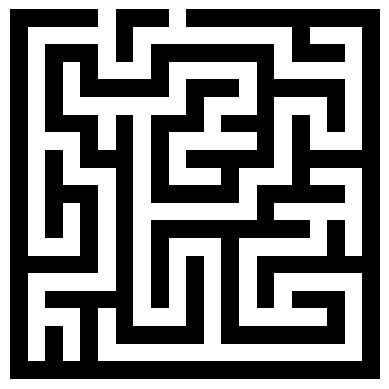

In [15]:
# -- Guardar el laberinto en un archivo png --
ruta = "C:/Users/JD/Desktop/fluid_sim/Assets/Mazes_nb"
maze = "maze_1"
metadata, matriz = mg.read_maze("./output/" + maze + ".txt")
plt.imshow(matriz, cmap='gray_r')
plt.axis('off')
plt.savefig(ruta + "/" + maze + ".png", transparent=True)

# -- Hacer blanco transparente y sobreescribir la imagen original --
from PIL import Image

img_path = ruta + "/" + maze + ".png"
img = Image.open(img_path).convert("RGBA")
datas = img.getdata()

nueva_data = []
for item in datas:
    # Detectar blanco (RGB 255,255,255) y ponerlo transparente
    if item[0] > 250 and item[1] > 250 and item[2] > 250:
        nueva_data.append((255, 255, 255, 0))  # transparente
    else:
        nueva_data.append(item)

img.putdata(nueva_data)
img.save(img_path, "PNG")  # Sobrescribe la imagen original

print(metadata)

In [ ]:
# Reescalar la matriz a 42x42, conectar obstáculos, y dejar parámetros de reescalado final

import csv

ruta_guardado = "C:/Users/JD/Desktop/fluid_sim/Assets/Mazes_csv"
maze = "maze_2"
metadata, matriz = mg.read_maze("./output/" + maze + ".txt")

# Reescalar la matriz a 42x42
nuevo_ancho = 21
nuevo_alto = 21

# NOTA IMPORTANTE:
# Si el laberinto se ve muy grande en Unity, debes usar una escala más pequeña.
# Por ejemplo, prueba con 0.001 o incluso 0.0005.
# Si los obstáculos desaparecen, sube un poco la escala hasta que se vean pero no sean gigantes.

escala_x = 2
escala_y = escala_x

matriz = cv2.resize(matriz, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_NEAREST)

# Conectar obstáculos: si hay dos obstáculos adyacentes (vertical u horizontal), rellenar entre ellos
def conectar_obstaculos(matriz):
    alto, ancho = matriz.shape
    nueva_matriz = matriz.copy()
    for y in range(alto):
        for x in range(ancho):
            if matriz[y, x] == 1:
                # Conectar horizontalmente
                if x < ancho - 1 and matriz[y, x+1] == 1:
                    for i in range(x+1, ancho):
                        if matriz[y, i] == 1:
                            nueva_matriz[y, x+1:i] = 1
                            break
                        elif matriz[y, i] == 0:
                            break
                # Conectar verticalmente
                if y < alto - 1 and matriz[y+1, x] == 1:
                    for j in range(y+1, alto):
                        if matriz[j, x] == 1:
                            nueva_matriz[y+1:j, x] = 1
                            break
                        elif matriz[j, x] == 0:
                            break
    return nueva_matriz

matriz = conectar_obstaculos(matriz)

alto, ancho = matriz.shape
centro_x = (ancho - 1) / 2.0
centro_y = (alto - 1) / 2.0

csv_rows = []
for y in range(alto):
    for x in range(ancho):
        valor = matriz[y, x]
        # Aplica el reescalado final
        pos_x = (x - centro_x) * escala_x
        pos_y = (centro_y - y) * escala_y  # y invertido para que la imagen no salga "al revés"
        # Para evitar problemas de la coma, dejamos el punto decimal estándar
        if valor == 1:
            fila = [
                'o',
                f"{pos_x:.0f}",
                f"{pos_y:.0f}",
                f"{escala_x:.0f}",
                f"{escala_y:.0f}"
            ]
            csv_rows.append(fila)
        elif valor == 0:
            fila = [
                's',
                f"{pos_x:.0f}",
                f"{pos_y:.0f}",
                f"{escala_x:.0f}",
                f"{escala_y:.0f}"
            ]
            csv_rows.append(fila)

csv_path = f"{ruta_guardado}/{maze}.csv"
with open(csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['class', 'pos_x', 'pos_y', 'width', 'height'])
    writer.writerows(csv_rows)

print(f"Archivo CSV guardado en: {csv_path}")


Archivo CSV guardado en: C:/Users/JD/Desktop/fluid_sim/Assets/Mazes_csv/maze_2.csv
